<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Interpolacion/Newton_Hermite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Interpolación Newton y Hermite

---

### Profesor: Juan Marcos Marín

---

# Método de Interpolación de Newton

Es una técnica para encontrar un polinomio que pase por un conjunto de puntos dados. A diferencia del polinomio de Lagrange, el método de Newton utiliza **diferencias divididas** y ofrece una forma más eficiente de actualizar el polinomio si se agregan nuevos puntos de interpolación. El polinomio resultante se expresa como una combinación lineal de productos incrementales.

## Polinomio de Newton

Para un conjunto de puntos $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$, el polinomio de interpolación de Newton de grado $n$ tiene la forma:

$$
P(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1) + \dots + a_n(x - x_0)(x - x_1)\dots(x - x_{n-1})
$$

Donde los coeficientes $a_i$ se calculan utilizando diferencias divididas, que se definen recursivamente.

## Diferencias Divididas

La interpolación de Newton se basa en las **diferencias divididas**, que se calculan de manera recursiva. Estas tiene la siguiente forma:

#### Primera diferencia dividida:
$$
f[x_i, x_{i+1}] = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}
$$

#### Segunda diferencia dividida:
$$
f[x_i, x_{i+1}, x_{i+2}] = \frac{f[x_{i+1}, x_{i+2}] - f[x_i, x_{i+1}]}{x_{i+2} - x_i}
$$

#### Diferencias divididas de orden superior:
$$
f[x_0, x_1, \dots, x_n] = \frac{f[x_1, x_2, \dots, x_n] - f[x_0, x_1, \dots, x_{n-1}]}{x_n - x_0}
$$

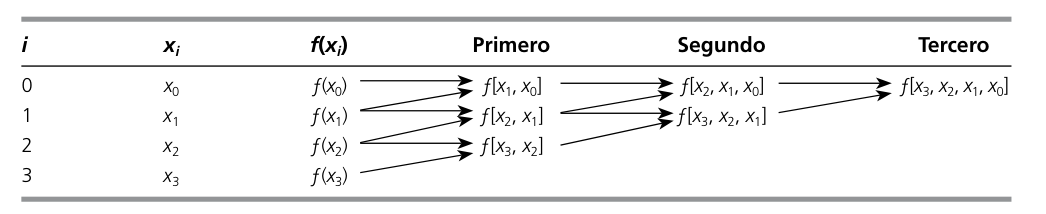

### Ejemplo de cálculo de diferencias divididas

Si tenemos los puntos $(x_0, y_0), (x_1, y_1), (x_2, y_2)$, los coeficientes $a_0$, $a_1$, y $a_2$ son:

1. $a_0 = f[x_0] = y_0$
2. $a_1 = f[x_0, x_1] = \frac{y_1 - y_0}{x_1 - x_0}$
3. $a_2 = f[x_0, x_1, x_2] = \frac{f[x_1, x_2] - f[x_0, x_1]}{x_2 - x_0}$

#### Ventajas del Método de Newton

- **Fácil actualización**: Si se añade un nuevo punto de interpolación, no es necesario recalcular todo el polinomio desde cero, ya que los coeficientes anteriores permanecen iguales.
- **Estabilidad numérica**: Al calcular el polinomio paso a paso, se reduce la posibilidad de errores numéricos en algunos casos.

#### Ejemplo

Supongamos que tenemos los puntos $(1, 1)$, $(2, 4)$, $(3, 9)$ correspondientes a $f(x) = x^2$. Para encontrar el polinomio interpolante:

1. $a_0 = 1$
2. $a_1 = \frac{4 - 1}{2 - 1} = 3$
3. $a_2 = \frac{\frac{9 - 4}{3 - 2} - \frac{4 - 1}{2 - 1}}{3 - 1} = 1$

El polinomio de interpolación es:

$$
P(x) = 1 + 3(x - 1) + 1(x - 1)(x - 2)
$$

Al simplificar:

$$
P(x) = x^2
$$

Este es el mismo polinomio que $f(x) = x^2$, ya que los puntos dados provienen de esa función.



  ## Forma general del polinomio de Newton

Para un conjunto de puntos $(x_0, x_1, \dots, x_n)$, el polinomio de interpolación de Newton es:

$$
P(x) = \sum_{i=0}^{n} f[x_0, x_1, \dots, x_i] \prod_{j=0}^{i-1} (x - x_j)
$$

Donde:
- $f[x_0, x_1, \dots, x_i]$ es la $i$-ésima diferencia dividida.
- $\prod_{j=0}^{i-1} (x - x_j)$ es el producto de los términos $(x - x_j)$ para $j = 0, 1, \dots, i-1$.

In [ ]:
def diferencia_dividida(x, y, i, j):
    '''
    Calcula recursivamente la diferencia dividida f[x_i, x_{i+1}, ..., x_j]
    Entradas:
      x: array de puntos x
      y: array de puntos y
      i: indice del primer punto
      j: indice del ultimo punto
    Salidas:
      a: coeficiente diferencia dividida (i,j)
    '''
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    '''
    Calcula los coeficientes a_i del polinomio de Newton.
    Entradas:
      x: array de puntos x
      y: array de puntos y
    Salidas:
      coeficientes: array de coeficientes a_i
    '''
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
  '''
  Calcula el polinomio de Newton a partir de los puntos (x, y)
  Entradas:
    x: array de puntos x
    y: array de puntos y
  Salidas:
    P: polinomio de Newton como una función de x
  '''
  coef = coeficientes_a(x, y)
  def P(x_val):
    resultado = coef[0]
    producto = 1
    for i in range(1, len(x)):
      producto *= (x_val - x[i - 1])
      resultado += coef[i] * producto
    return resultado
  return P

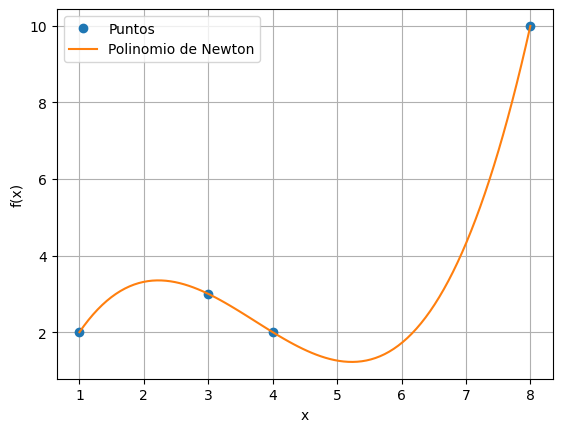

In [ ]:
# Datos
x = np.array([1, 3, 4, 8])
y = np.array([2, 3, 2, 10])

# Polinomio de interpolación
P_n = Polinomio_Newton(x, y)

# Valores a interpolar e interpolados
x_interpo = np.linspace(min(x), max(x), 100)
y_interpo = [P_n(xi) for xi in x_interpo]


# Gráfico
plt.plot(x, y, 'o', label='Puntos')
plt.plot(x_interpo, y_interpo, label='Polinomio de Newton')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

# Interpolación de Hermite

La interpolación de Hermite es una técnica que se utiliza cuando, además de los valores de la función, también se conocen las derivadas en algunos puntos. Esta técnica busca construir un polinomio que no solo pase por los puntos dados, sino que también ajuste las pendientes (derivadas) en esos puntos, lo que proporciona una aproximación más precisa que la interpolación de Lagrange, en casos donde la suavidad es importante.

## Polinomio de Hermite

Para un conjunto de puntos $x_0, x_1, \dots, x_n$, con valores $f(x_0), f(x_1), \dots, f(x_n)$ y derivadas $f'(x_0), f'(x_1), \dots, f'(x_n)$, el polinomio de Hermite $H(x)$ está dado por:

$$
H(x) = \sum_{i=0}^{n} \left( h_i^2(x)(1 - 2(x - x_i)h_i'(x_i))f(x_i) + h_i^2(x)(x - x_i)f'(x_i) \right)
$$

donde:

- $h_i(x)$ es la base de Lagrange definida como:

$$h_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^n \frac{x - x_j}{x_i - x_j}$$

- $h_i'(x_i)$ es la derivada de $h_i(x)$ evaluada en el punto $x_i$.

El polinomio de Hermite ajusta tanto los valores de la función como las derivadas en los puntos dados, garantizando que el polinomio no solo pase por los puntos de control, sino que también tenga la misma pendiente en esos puntos.





## Ejemplo

Queremos construir el polinomio de Hermite para los siguientes puntos y sus derivadas:

- $f(x_0) = 1$, $f'(x_0) = 1$ en $x_0 = 0$
- $f(x_1) = 2.7183$, $f'(x_1) = 2.7183$ en $x_1 = 1$

### Paso 1: Funciones base de Lagrange

Primero, definimos las funciones base de Lagrange $h_0(x)$ y $h_1(x)$ para los puntos $x_0 = 0$ y $x_1 = 1$:

$$
h_0(x) = \frac{x - x_1}{x_0 - x_1} = \frac{x - 1}{0 - 1} = 1 - x
$$

$$
h_1(x) = \frac{x - x_0}{x_1 - x_0} = \frac{x - 0}{1 - 0} = x
$$

Las derivadas de estas funciones base son:

$$
h_0'(x_0) = \frac{d}{dx}(1 - x) = -1
$$

$$
h_1'(x_1) = \frac{d}{dx}(x) = 1
$$

### Paso 2: Construcción del Polinomio de Hermite

El polinomio de Hermite se construye combinando tanto los valores de la función como las derivadas en los puntos dados. La fórmula para el polinomio de Hermite es:

$$
H(x) = \sum_{i=0}^{1} \left( h_i^2(x)(1 - 2(x - x_i)h_i'(x_i))f(x_i) + h_i^2(x)(x - x_i)f'(x_i) \right)
$$

* Términos para $x_0 = 0$

Para $i = 0$, tenemos:

$$
h_0(x) = 1 - x, \quad h_0'(x_0) = -1
$$

$$
f(x_0) = 1, \quad f'(x_0) = 1
$$

El término correspondiente al punto $x_0 = 0$ es:

$$
h_0^2(x) = (1 - x)^2
$$

$$
(1 - 2(x - x_0)h_0'(x_0)) = 1 - 2(x - 0)(-1) = 1 + 2x
$$

El primer término del polinomio es:

$$
(1 + 2x)(1 - x)^2(1) + (x - 0)(1 - x)^2(1)
$$

Simplificando:

$$
3x^3-5x^2+x+1
$$


* Términos para $x_1 = 1$

Para $i = 1$, tenemos:

$$
h_1(x) = x, \quad h_1'(x_1) = 1
$$

$$
f(x_1) = 2.7183, \quad f'(x_1) = 2.7183
$$

El término correspondiente al punto $x_1 = 1$ es:

$$
h_1^2(x) = x^2
$$

$$
(1 - 2(x - x_1)h_1'(x_1)) = 1 - 2(x - 1)(1) = 3 - 2x
$$

El segundo término del polinomio es:

$$
x^2(x - 1)(2.7183)
$$

Simplificando:

$$
(2.7183)(-x^3+2x^2)
$$



## Paso 3: Polinomio Completo

Finalmente, sumamos los términos correspondientes a $x_0 = 0$ y $x_1 = 1$ para obtener el polinomio completo de Hermite:

$$
H(x) = (3x^3-5x^2+x+1) + 2.7183(-x^3+2x^2)
$$

Simplificamos el polinomio:

$$
H(x) = 0.2817x^3+0.4366x^2+x+1
$$

Este es el polinomio de Hermite que interpola los valores y derivadas en los puntos $x_0 = 0$ y $x_1 = 1$.


In [3]:
def hermite_interpolation(x_points, y_points, derivatives):
    """
    Interpolación de Hermite usando la fórmula correcta de Hermite.

    Args:
        x_points (list): Lista de puntos x donde se evalúa la función.
        y_points (list): Lista de valores f(x) en los puntos x.
        derivatives (list): Lista de derivadas f'(x) en los puntos x.

    Returns:
        sympy expression: El polinomio de Hermite.
    """
    x = sp.symbols('x')  # Variable simbólica
    n = len(x_points)      # Número de puntos de interpolación
    H = 0                   # Inicializar el polinomio de Hermite

    for i in range(n):
        # Polinomio de Lagrange h_i(x)
        h_i = 1
        for j in range(n):
            if j != i:
                h_i *= (x - x_points[j]) / (x_points[i] - x_points[j])

        # Derivada de L_i(x) evaluada en x_i
        h_i_prime = sp.diff(h_i, x).subs(x, x_points[i])

        # Términos del polinomio de Hermite
        term1 = (h_i**2) * (1 - 2 * (x - x_points[i]) * h_i_prime) * y_points[i]
        term2 = (h_i**2) * (x - x_points[i]) * derivatives[i]

        # Sumar el término al polinomio total
        H += term1 + term2

    return sp.simplify(H)


0.281718171540955*x**3 + 0.436563656918091*x**2 + 1.0*x + 1.0

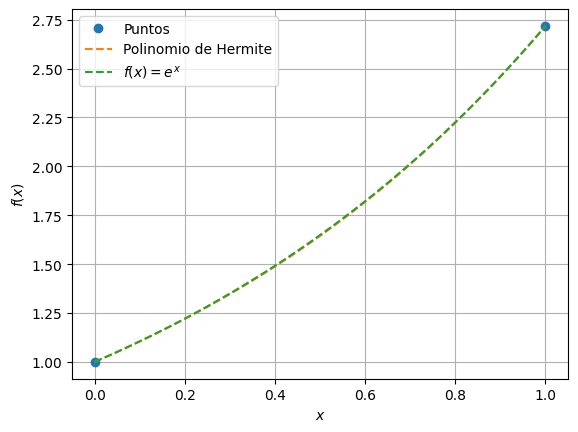

In [7]:
x_points = np.array([0, 1])  # Puntos donde se evalúa la función
y_points = np.exp(x_points) # Valores de la función en los puntos
derivatives = np.exp(x_points)  # Derivadas de la función en los puntos

hermite_poly = hermite_interpolation(x_points, y_points, derivatives)
display(hermite_poly)
hermite_function = sp.lambdify(sp.symbols('x'), hermite_poly, 'numpy')

# Grafico

x_interp = np.linspace(min(x_points), max(x_points), 100)
y_interp = hermite_function(x_interp)
plt.plot(x_points, y_points, 'o', label='Puntos')
plt.plot(x_interp, y_interp, '--', label='Polinomio de Hermite')
plt.plot(x_interp, np.exp(x_interp), '--', label='$f(x)= e^x$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()
